In [1]:
from datasets import load_dataset

language_pair = "en-es" # unfortunately, for this huggingface impl, only english-nonenglish sets are available!
ds = load_dataset("sentence-transformers/parallel-sentences-global-voices", language_pair)
data = ds["train"]
print("language_pair=", language_pair)
print("number of examples=", len(data))

for i in range(10):
    print("==========",i,"==========")
    print("English : ",data[i]["english"])
    print("Spanish : ",data[i]["non_english"])


language_pair= en-es
number of examples= 248152
========== 0 ==========
English :  Argentina: Stencil Graffiti · Global Voices
Spanish :  Argentina: Graffitis
========== 1 ==========
English :  Line of Sight has an excellent collection of stencil graffiti from around Buenos Aires.
Spanish :  'Line of Sight' tiene una excelente colección de graffitis de lugares de Buenos Aires.
========== 2 ==========
English :  Most images have captions explaining the significance.
Spanish :  La mayoría de las imágenes tienen notas explicando el significado.
========== 3 ==========
English :  Argentina: La Boca - Impressions · Global Voices
Spanish :  Argentina: Impresiones de La Boca
========== 4 ==========
English :  Marisa of It Takes Two to Tango offers up her impressions of La Boca, Argentina.
Spanish :  Marisa de 'It Takes Two to Tango' entrega sus impresiones de La Boca, Argentina .
========== 5 ==========
English :  Bahrain: Look ma, I'm on a Segway! · Global Voices
Spanish :  Bahréin: Mírenme,

In [2]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load pre-trained BERT model and tokenizer
model_name = "distilbert-base-uncased"  # You can choose other models like 'distilbert-base-uncased' for lighter computation
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Input sentence
sentence = "The river bank near my house"

# Tokenize input and find the token index for "bank"
inputs = tokenizer(sentence, return_tensors="pt", add_special_tokens=True, return_offsets_mapping=True)

device = torch.device("mps")  # Use "cpu" or "cuda" otherwise
model = model.to(device)
inputs = {key: val.to(device) for key, val in inputs.items()}

tokens = tokenizer.tokenize(sentence)
token_offsets = inputs.pop("offset_mapping")  # offsets help locate specific words in tokenized input

# Find the position of the word "bank"
word = "bank"
token_index = None
for idx, token in enumerate(tokens):
    if word in tokenizer.convert_ids_to_tokens(tokenizer(sentence)["input_ids"][idx]):
        token_index = idx
        break

if token_index is None:
    raise ValueError(f"Word '{word}' not found in the tokenized input!")

# Forward pass through the model
outputs = model(**inputs)
last_hidden_state = outputs.last_hidden_state  # Shape: (batch_size, seq_len, hidden_dim)

# Extract the embedding for "bank"
word_embedding = last_hidden_state[0, token_index]  # Shape: (hidden_dim,)

print(f"Embedding for the word '{word}': {word_embedding}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Embedding for the word 'bank': tensor([ 8.9732e-03,  1.6309e-02, -6.2532e-02, -1.5601e-01,  4.0724e-01,
         2.4147e-01, -2.2613e-02,  8.3624e-01,  2.0457e-02, -2.0351e-01,
         6.9401e-01, -2.6155e-02,  6.3173e-02,  2.7300e-01, -8.2933e-01,
         5.0270e-01, -9.3802e-02,  4.0302e-02,  7.9130e-01, -9.2057e-03,
         1.5280e-01,  2.3402e-02,  9.3546e-02,  5.0466e-01, -1.0460e-01,
         4.2861e-01,  8.0113e-02,  2.1725e-01, -3.3427e-02,  5.7774e-02,
         6.4635e-01,  2.4915e-01,  3.9355e-02, -3.1145e-01, -4.6631e-01,
        -5.4640e-01, -1.6279e-01, -1.3412e-01, -1.5433e-01,  3.5504e-01,
        -3.3728e-01, -6.6752e-01, -5.9960e-01,  5.9690e-01,  7.6920e-02,
         6.9151e-02, -1.5769e-01, -9.4401e-02, -2.6719e-01,  5.7450e-02,
         2.1746e-01,  9.2285e-01, -2.2893e-01, -4.5326e-01,  1.4801e-01,
         5.1012e-01, -2.0571e-01, -4.8582e-01, -1.5165e-01, -2.7757e-01,
         4.8893e-01, -1.3370e-01,  1.4235e-01, -5.1737e-02,  1.9411e-02,
         3.9010e-01,

In [3]:
len(word_embedding)

768

In [13]:
from nltk.corpus import wordnet as wn

# Example usage
word = "example"
synsets = wn.synsets(word)
for syn in synsets:
    print(f"Word: {syn.name()}")
    print(f"Definition: {syn.definition()}")
    print(f"Examples: {syn.examples()}")

Word: seventy-three.s.01
Definition: being three more than seventy
Examples: []


In [15]:
# Get all words (lemmas) in WordNet
all_words = list(wn.all_lemma_names())

# Display a small sample of the words
print(f"Total words: {len(all_words)}")
print(list(all_words)[:200])  # Display the first 20 words

Total words: 147306
['.22-caliber', '.22-calibre', '.22_caliber', '.22_calibre', '.38-caliber', '.38-calibre', '.38_caliber', '.38_calibre', '.45-caliber', '.45-calibre', '.45_caliber', '.45_calibre', '0', '1', '10', '10-membered', '100', '1000', '1000th', '100th', '101', '101st', '105', '105th', '10th', '11', '110', '110th', '115', '115th', '11th', '12', '120', '120th', '125', '125th', '12th', '13', '130', '130th', '135', '135th', '13th', '14', '140', '140th', '145', '145th', '14th', '15', '150', '150th', '155', '155th', '15th', '16', '160', '160th', '165', '165th', '16th', '17', '170', '170th', '175', '175th', '17th', '18', '180', '180th', '18th', '19', '190', '190th', '19th', '1st', '2', '2-dimensional', '20', '200', '200th', '20th', '21', '21st', '22', '22nd', '23', '23rd', '24', '24th', '25', '25th', '26', '26th', '27', '27th', '28', '28th', '29', '29th', '2d', '2nd', '3', '3-dimensional', '3-membered', '30', '300', '300th', '30th', '31', '31st', '32', '32nd', '33', '33rd', '34', 

In [21]:
all_synsets = list(wn.all_synsets())

for i, synset in enumerate(all_synsets[:20]):  # Limit to the first 20
    print(f"Word: {synset.name()}")
    print(f"Synset {i+1}: {synset.lemma_names()}")
    print(f"  Definition: {synset.definition()}")
    print(f"  Examples: {synset.examples()}")
    print("-----")

Word: able.a.01
Synset 1: ['able']
  Definition: (usually followed by `to') having the necessary means or skill or know-how or authority to do something
  Examples: ['able to swim', 'she was able to program her computer', 'we were at last able to buy a car', 'able to get a grant for the project']
-----
Word: unable.a.01
Synset 2: ['unable']
  Definition: (usually followed by `to') not having the necessary means or skill or know-how
  Examples: ['unable to get to town without a car', 'unable to obtain funds']
-----
Word: abaxial.a.01
Synset 3: ['abaxial', 'dorsal']
  Definition: facing away from the axis of an organ or organism
  Examples: ['the abaxial surface of a leaf is the underside or side facing away from the stem']
-----
Word: adaxial.a.01
Synset 4: ['adaxial', 'ventral']
  Definition: nearest to or facing toward the axis of an organ or organism
  Examples: ['the upper side of a leaf is known as the adaxial surface']
-----
Word: acroscopic.a.01
Synset 5: ['acroscopic']
  Definit

In [22]:
type(word_embedding)

torch.Tensor

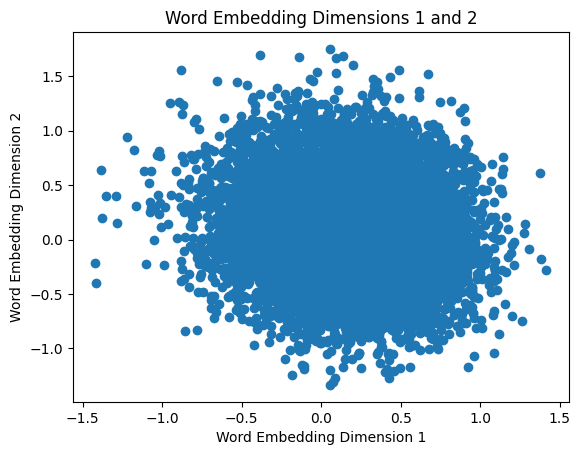

In [26]:
import json
import matplotlib.pyplot as plt

# Open and load the JSON file
with open('embeddings_dataset.json', 'r') as file:
    data = json.load(file)

# Extract the first two dimensions of the word_embedding for each item
x = [item['word_embedding'][0] for item in data]
y = [item['word_embedding'][700] for item in data]

# Plot using matplotlib
plt.scatter(x, y)
plt.xlabel('Word Embedding Dimension 1')
plt.ylabel('Word Embedding Dimension 2')
plt.title('Word Embedding Dimensions 1 and 2')
plt.show()

In [34]:
import numpy as np
for dim in range(768):
    # Initialize variables to track the words and values for Dimension 1
    max_dim_value = -np.inf
    min_dim_value = np.inf
    closest_to_zero_dim = np.inf
    
    max_dim_word = ""
    min_dim_word = ""
    closest_to_zero_dim_word = ""
    
    # Iterate over each item in data
    for item in data:
        word = item["word"]
        word_embedding = item["word_embedding"]
        
        # Get the value for Dimension dim
        dim_value = word_embedding[dim]
        
        # For Dimension 1: Find the highest, lowest, and closest-to-zero values
        if dim_value > max_dim_value:
            max_dim_value = dim_value
            max_dim_word = word
            
        if dim_value < min_dim_value:
            min_dim_value = dim_value
            min_dim_word = word
            
        if abs(dim_value) < abs(closest_to_zero_dim):
            closest_to_zero_dim = dim_value
            closest_to_zero_dim_word = word
    
    # Print the results for Dimension 1
    print(f"D{dim}:\t {max_dim_word} > {closest_to_zero_dim_word} > {min_dim_word}")

D0:	 traffic > decide > left
D1:	 disgust > conventional > due
D2:	 debut > slain > battle
D3:	 stretch > audience > book
D4:	 colored > eccentric > vent
D5:	 hard > plant > prohibition
D6:	 deadly > see > parked
D7:	 mouth > attractive > formal
D8:	 sign > tracing > meritorious
D9:	 decommission > license > once
D10:	 goal > ribbon > live
D11:	 minimize > standing > particular
D12:	 competitive > tender > unlimited
D13:	 erupt > microwave > theology
D14:	 clouded > crime > chromosome
D15:	 bloody > corner > spy
D16:	 movement > hooks > neolithic
D17:	 object > recess > specialize
D18:	 willingness > combine > head
D19:	 cultural > directly > cross
D20:	 wish > awkward > social
D21:	 principle > pop > par
D22:	 graduate > advise > race
D23:	 charge > rune > school
D24:	 consequently > convinced > lunar
D25:	 certified > everyday > colored
D26:	 oppose > distinguished > road
D27:	 minister > reject > honestly
D28:	 set > affiliation > do
D29:	 series > nothing > out
D30:	 so > crisp > s